In [1]:
import numpy as np

# Importing Qiskit
from qiskit import IBMQ, Aer, QuantumCircuit, execute
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info import Operator
from qiskit.tools.jupyter import *
provider = IBMQ.load_account()

# For plotting
from qiskit.visualization import plot_histogram

In [3]:
def phase_oracle(n, indices_to_mark, name='Oracle'):
    qc = QuantumCircuit(n,name = name)
    oracle_matrix = np.identity(2**n)
    for index_to_mark in indices_to_mark:
        oracle_matrix[index_to_mark,index_to_mark] = -1
    qc.unitary(Operator(oracle_matrix),range(n))
    return qc

def diffuser(n):
    qc = QuantumCircuit(n,name = "Diff - 'V'")
    qc.h(range(n))
    qc.append(phase_oracle(n,[0]),range(n))
    qc.h(range(n))
    return qc

def Grover(n,marked):
    qc = QuantumCircuit(n,n)
    r = int(np.round(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2))
    print(f"{n} qubits, basis state {marked} marked, {r} rounds")
    qc.h(range(n))
    for _ in range(r):
        qc.append(phase_oracle(n,marked),range(n))
        qc.append(diffuser(n),range(n))
    qc.measure(range(n),range(n))
    return qc

In [4]:
n = 5
x = np.random.randint(2**n)
marked = [x]
qc = Grover(n,marked)

qc.draw()

5 qubits, basis state [28] marked, 4 rounds


┌───┐┌─────────┐┌─────────────┐┌─────────┐┌─────────────┐┌─────────┐»
q_0: ┤ H ├┤0        ├┤0            ├┤0        ├┤0            ├┤0        ├»
     ├───┤│         ││             ││         ││             ││         │»
q_1: ┤ H ├┤1        ├┤1            ├┤1        ├┤1            ├┤1        ├»
     ├───┤│         ││             ││         ││             ││         │»
q_2: ┤ H ├┤2 Oracle ├┤2 Diff - 'V' ├┤2 Oracle ├┤2 Diff - 'V' ├┤2 Oracle ├»
     ├───┤│         ││             ││         ││             ││         │»
q_3: ┤ H ├┤3        ├┤3            ├┤3        ├┤3            ├┤3        ├»
     ├───┤│         ││             ││         ││             ││         │»
q_4: ┤ H ├┤4        ├┤4            ├┤4        ├┤4            ├┤4        ├»
     └───┘└─────────┘└─────────────┘└─────────┘└─────────────┘└─────────┘»
c: 5/════════════════════════════════════════════════════════════════════»
                                                                         »
«     ┌─────────────┐┌─────────┐┌─────────────┐┌─┐            
«q_0: ┤0            ├┤0        ├┤0            ├┤M├────────────
«     │             ││         ││             │└╥┘┌─┐         
«q_1: ┤1            ├┤1        ├┤1            ├─╫─┤M├─────────
«     │             ││         ││             │ ║ └╥┘┌─┐      
«q_2: ┤2 Diff - 'V' ├┤2 Oracle ├┤2 Diff - 'V' ├─╫──╫─┤M├──────
«     │             ││         ││             │ ║  ║ └╥┘┌─┐   
«q_3: ┤3            ├┤3        ├┤3            ├─╫──╫──╫─┤M├───
«     │             ││         ││             │ ║  ║  ║ └╥┘┌─┐
«q_4: ┤4            ├┤4        ├┤4            ├─╫──╫──╫──╫─┤M├
«     └─────────────┘└─────────┘└─────────────┘ ║  ║  ║  ║ └╥┘
«c: 5/══════════════════════════════════════════╩══╩══╩══╩══╩═
«                                               0  1  2  3  4

{'11100': 9990, '00110': 1, '01111': 1, '10111': 1, '01010': 2, '01001': 2, '11110': 1, '00000': 1, '00010': 1}
3.919534679768385


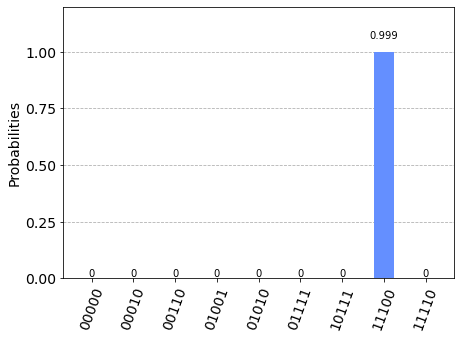

In [6]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc,backend,shots = 10000).result()
counts = result.get_counts(qc)
print(counts)
print(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2)
plot_histogram(counts)

In [9]:
n=3
x = np.random.randint(2**n)
y = np.random.randint(2**n)
while y==x:
    y=np.random.randint(2**n)
marked = [x,y]
qc = Grover(n,marked)

backend = least_busy(provider.backends(filters = lambda x: x.configuration().n_qubits == 5 and not x.configuration().simulator and x.status().operational==True))
print("Least busy backend: ",backend)
%qiskit_job_watcher
shots = 1024
job = execute(qc,backend = backend, shots = shots, optimization_level=3)

3 qubits, basis state [2, 3] marked, 1 rounds
Least busy backend:  ibmq_belem


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

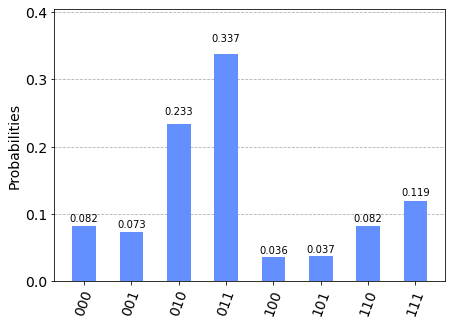

In [10]:
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

In [ ]:
# 6356ac8ec585ea6a0c7a9b3b